# Analysing Tracking cookies stored on my computer

Analysing cookies can be fun to know which sites are adding how much cokies on your system.
To knowe whether they are cross referencing cokies from other sites to track you. 

Below are 3 major browsers which I am using my computer and respective cookies file locations:

* Google Chrome - `C:\USERS\<username>\APPDATA\LOCAL\GOOGLE\CHROME\USER DATA\DEFAULT\COOKIES`
* Mozilla Firefox - `C:\USERS\<username>\APPDATA\ROAMING\MOZILLA\FIREFOX\PROFILES\<profile-ID>.DEFAULT\COOKIES.SQLITE`
* IE - `C:\Users\<username>\AppData\Local\Microsoft\Windows\INetCookies\`

Cokies may be stored in SQLITE. So we need to load all data from SQLITE database.

For simplicity, I will only read the domain names of the cookie and check which all sit4es storing tracking cookies.

In [108]:
import pandas as pd
import numpy as np

In [109]:
#Read Cookies data
df = pd.read_csv("Cookies.csv")

In [110]:
# Check the data
df.head()

,Index,Cookies
0,1,1rx.io
1,2,3lift.com
2,3,3lift.com
3,4,3lift.com
4,5,abmr.net


In [99]:
df.describe()

,Index
count,532.000000
mean,266.500000
std,153.719441
min,1.000000
25%,133.750000
50%,266.500000
75%,399.250000
max,532.000000


In [100]:
type(df['Cookies'].value_counts())

pandas.core.series.Series

In [119]:
#Count frequency
frequency = df['Cookies'].value_counts().to_dict()
#frequency

#### <span style="color:red"> Important: How to get frequency count of column value in data frame and convert the frequency table back into another dataframe.</span>

### Here are the top 10 sites with number of cookies set.
* PubMatic is a company which develops and implements online advertising software and strategies for the publishing industry.
* Media.net is a contextual advertising network. Chinese Consortium Acquired Media.Net.
* AddThis is a social bookmarking service.
* Casale Media cookies are used to inform the Casale Media Online Advertising Exchange (Index) whether or not an advertisement has been served to the same computer before, and if so, when the advertisement was served. These cookies are not used by Casale Media to build a profile of a user's behaviour nor are they used by Casale Media for the purposes of behavioural tracking or behavioural targeting. -- WTF ! 

In [113]:
# IMPORTANT

df2 = pd.DataFrame(data=frequency.values(),index=frequency.keys())
df2.head(10)

,0
pubmatic.com,47
media.net,16
addthis.com,14
casalemedia.com,12
w55c.net,9
webengage.com,8
www.googleadservices.com,8
openx.net,7
rubiconproject.com,7
adnxs.com,7


#### <span style="color:red"> Important: How to rename columns in dataframe. And provide name to index fields</span>

In [114]:
# SETTING NAME FOR INDEX:
df2.index.name = 'website'

# RENAMING COLUMN NAMES:
df2.columns=['Count']


#CREATE COPY OF INDEX NAME AS A NEW COLUMN: BEACUSE YOU CANNOT PLOT THE INDEX NAMES in plots
df2['site_name'] = df2.index


df2.head()

,Count,site_name
website,,
pubmatic.com,47,pubmatic.com
media.net,16,media.net
addthis.com,14,addthis.com
casalemedia.com,12,casalemedia.com
w55c.net,9,w55c.net


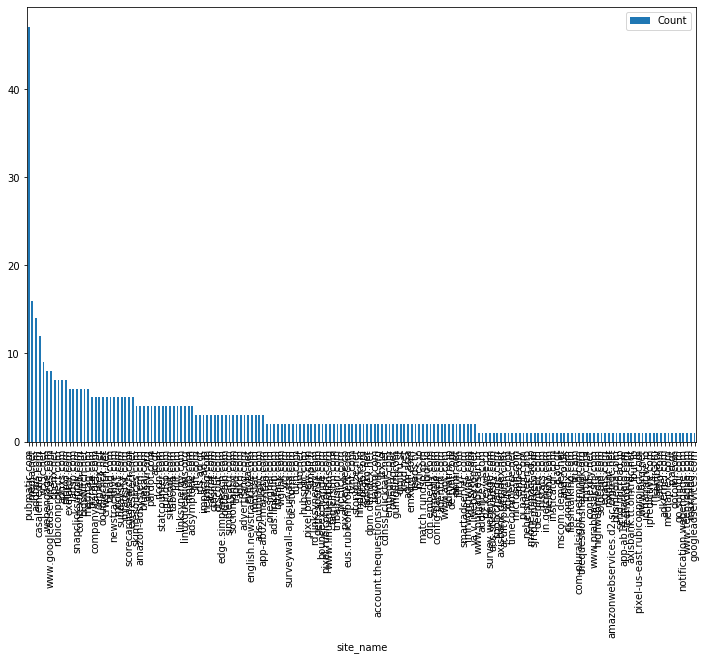

In [115]:
df2.plot(kind='bar',x='site_name',y='Count', figsize=(12,8))


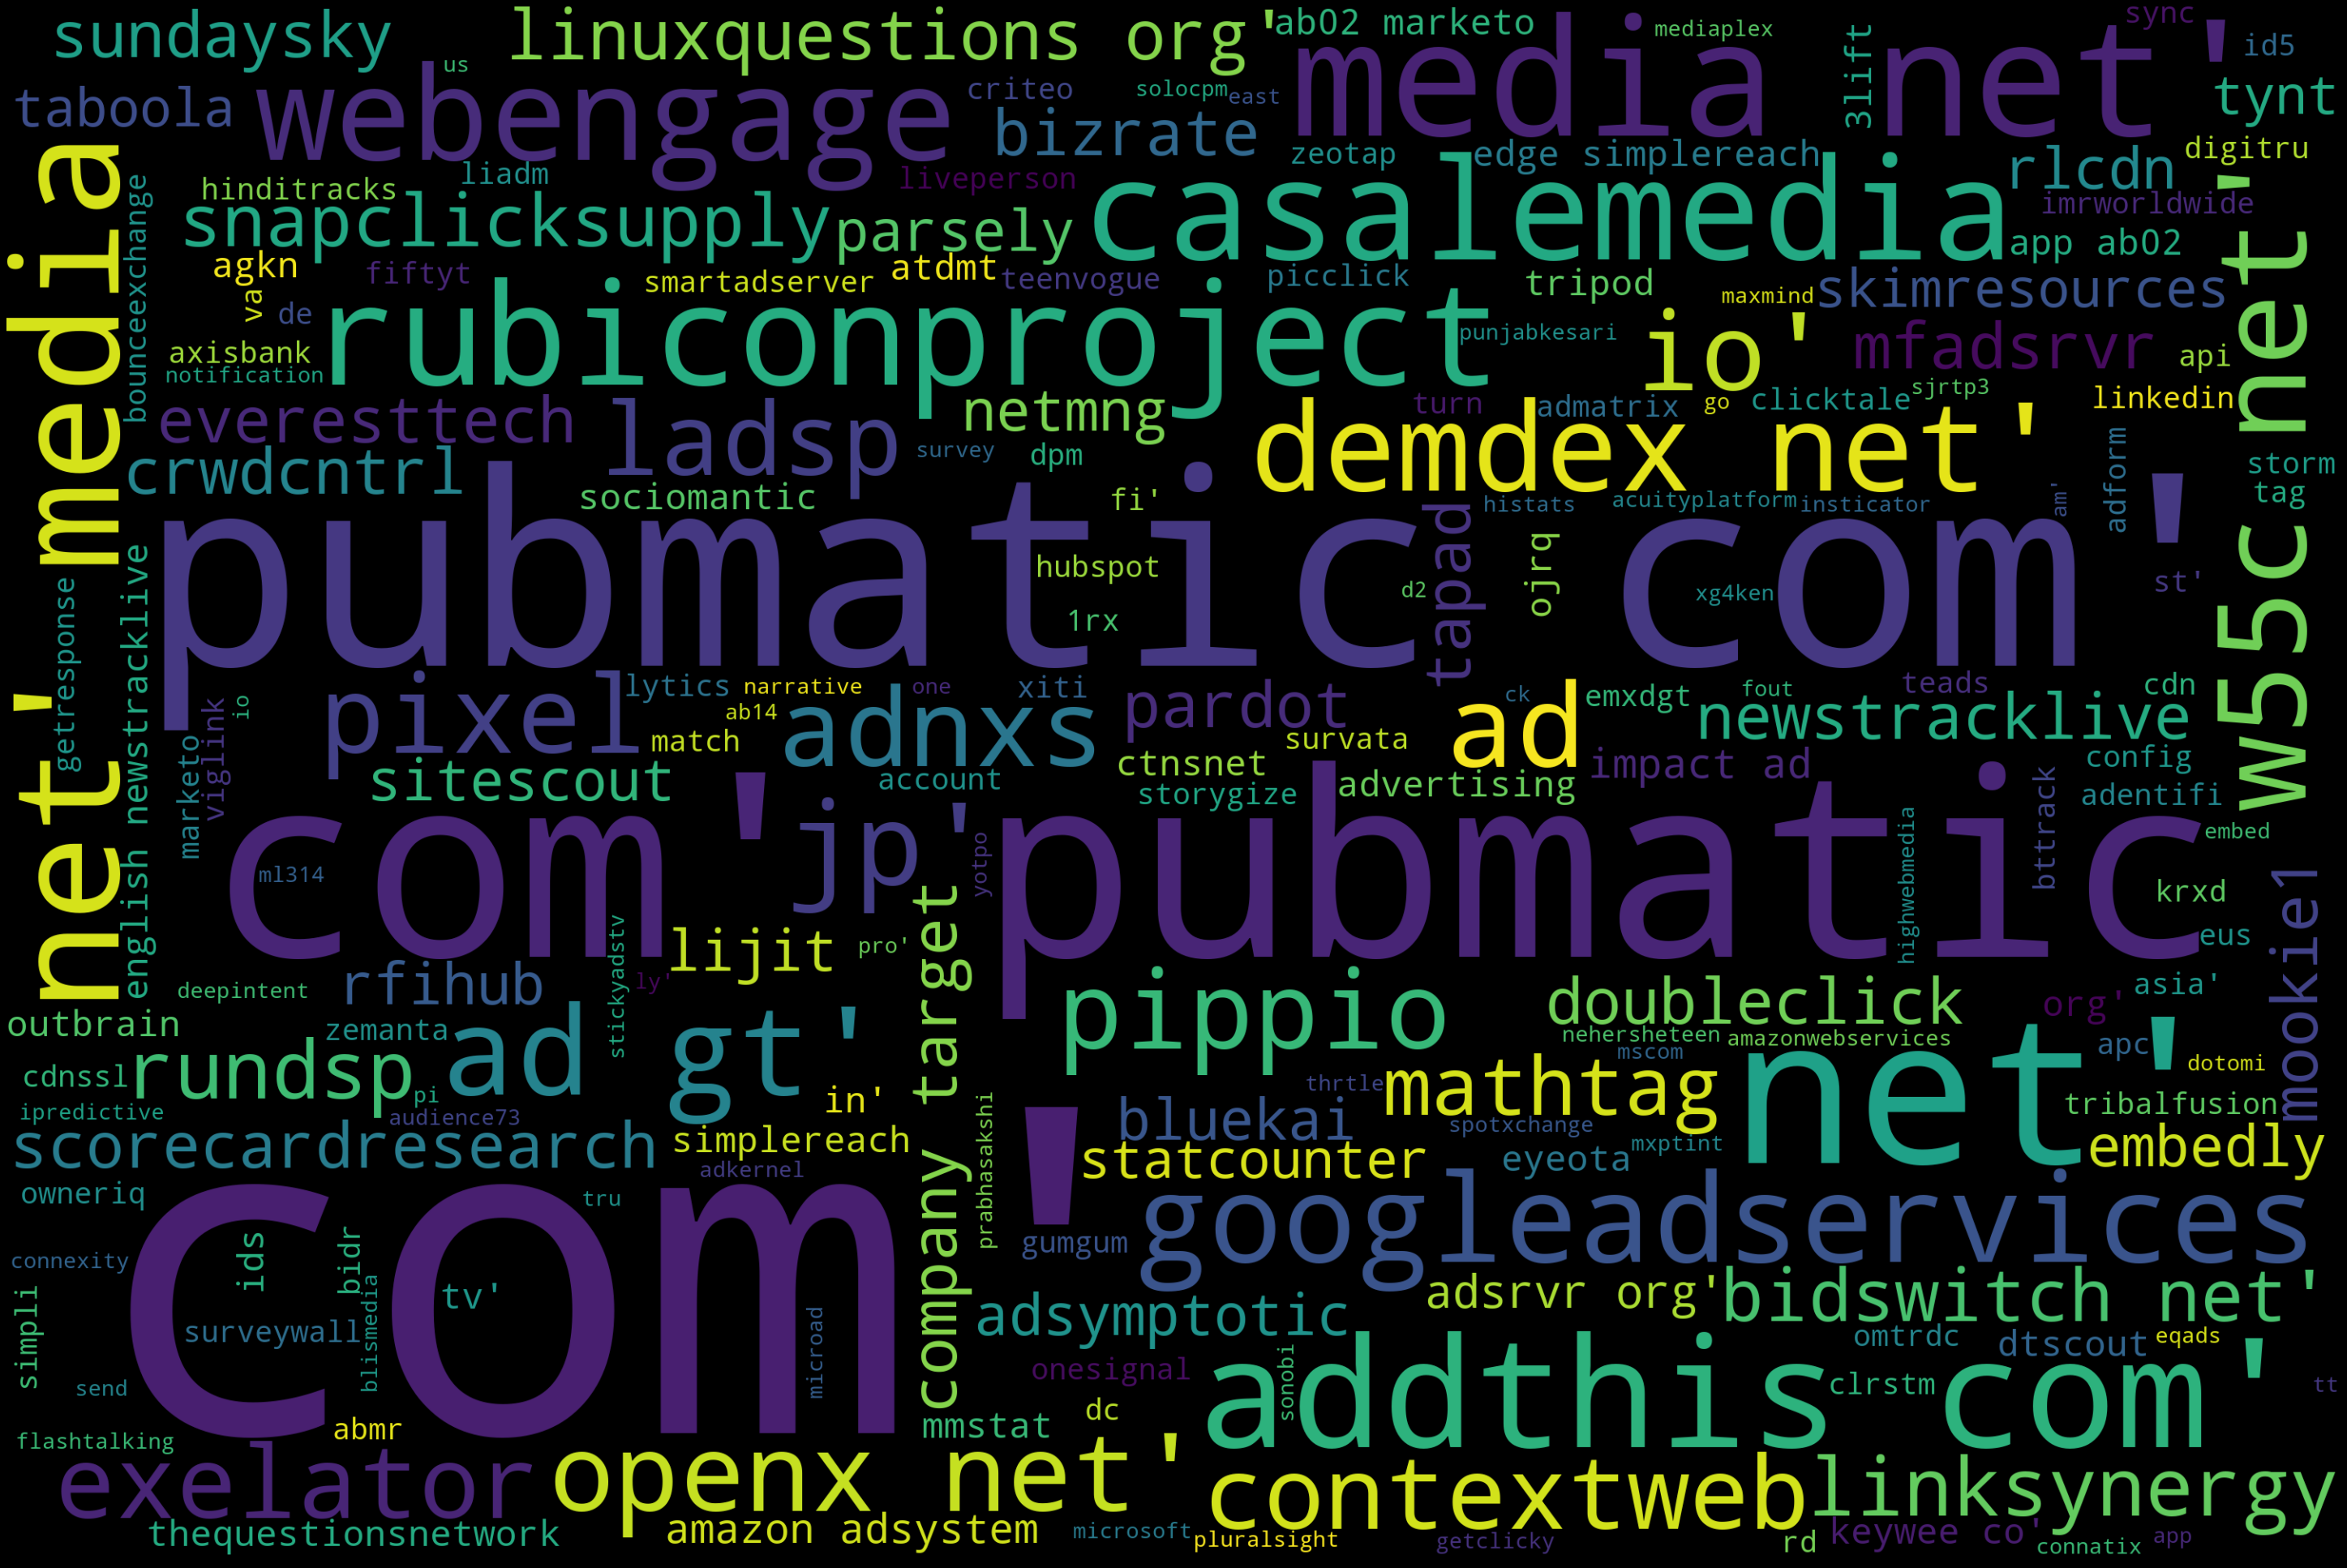

In [118]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = df.Cookies.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()




#### Word cloud is better than frequency bar graph. Interactive word cloud would be even better. Let me know if you know any Python library for generating interactive tag cloud. 